#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('simulatedtraffic_data.csv')

df.head()

,vehicle_id,vehicle_type,speed_kmh,timestamp,location,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,1,Car,60,2025-04-14T00:00:00Z,PointA,NaN,288.28,0,0,40,Clouds,scattered clouds,5545
1,2,Truck,45,2025-04-14T00:05:00Z,PointB,NaN,289.36,0,0,75,Clouds,broken clouds,4516
2,3,Motorbike,80,2025-04-14T00:10:00Z,PointC,NaN,289.58,0,0,90,Clouds,overcast clouds,4767
3,4,Car,70,2025-04-14T00:15:00Z,PointD,NaN,290.13,0,0,90,Clouds,overcast clouds,5026
4,5,Bicycle,25,2025-04-14T00:20:00Z,PointE,NaN,291.14,0,0,75,Clouds,broken clouds,4918


In [3]:
relevant_columns = [
    'vehicle_type', 'speed_kmh', 'timestamp', 'holiday', 'temp',
    'rain_1h', 'snow_1h', 'clouds_all', 'weather_main',
    'weather_description', 'traffic_volume'
]

df = df[relevant_columns]
df.head()


,vehicle_type,speed_kmh,timestamp,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,traffic_volume
0,Car,60,2025-04-14T00:00:00Z,NaN,288.28,0,0,40,Clouds,scattered clouds,5545
1,Truck,45,2025-04-14T00:05:00Z,NaN,289.36,0,0,75,Clouds,broken clouds,4516
2,Motorbike,80,2025-04-14T00:10:00Z,NaN,289.58,0,0,90,Clouds,overcast clouds,4767
3,Car,70,2025-04-14T00:15:00Z,NaN,290.13,0,0,90,Clouds,overcast clouds,5026
4,Bicycle,25,2025-04-14T00:20:00Z,NaN,291.14,0,0,75,Clouds,broken clouds,4918


In [4]:
# Feature Engineering
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['day'] = df['timestamp'].dt.dayofweek
df = df.drop('timestamp', axis=1)


#### Split the data

In [5]:
df = pd.get_dummies(df, columns=['vehicle_type', 'weather_main', 'weather_description', 'holiday'], drop_first=True)

In [6]:
df.dropna(inplace=True)


In [7]:
X = df.drop('traffic_volume', axis=1)
y = df['traffic_volume']


#### Train the model

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [9]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [10]:
y_pred = model.predict(X_test)

# Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# RSE & RAE
rse = np.sum((y_test - y_pred)**2) / np.sum((y_test - np.mean(y_test))**2)
rae = np.sum(np.abs(y_test - y_pred)) / np.sum(np.abs(y_test - np.mean(y_test)))

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²: {r2:.2f}")
print(f"RSE: {rse:.2f}")
print(f"RAE: {rae:.2f}")


MAE: 1561.40
RMSE: 1799.57
R²: 0.10
RSE: 0.90
RAE: 0.89


#### Prediction

#### Visualization

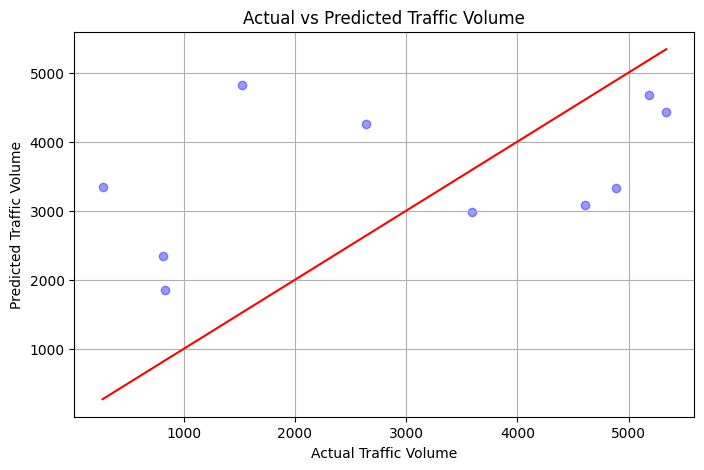

In [11]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.4, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.xlabel('Actual Traffic Volume')
plt.ylabel('Predicted Traffic Volume')
plt.title('Actual vs Predicted Traffic Volume')
plt.grid(True)
plt.show()


In [12]:
import os
import joblib

# Create the directory for saving the model
os.makedirs('models', exist_ok=True)

# Save the trained model with a meaningful name
joblib.dump(model, 'models/traffic_flow_model.pkl')


['models/traffic_flow_model.pkl']

In [13]:
loaded_model = joblib.load('models/traffic_flow_model.pkl')
predictions = loaded_model.predict(X_test)
